In [1]:
!pip install pymorphy3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 24.4 MB/s eta 0:00:00


In [2]:
import rus_anaphora
import graph.graph as graph
import graph.higher_dim_graph as higher_dim_graph
from graph.edge import Edge

✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [6]:
text = '''Конечно, дарвинизм в его изначальном виде столкнулся с более значительными и
непосредственными проблемами, чем вопрос о достаточности естественного отбора: Дарвин и
его ранние последователи не имели представления о механизмах наследования и о том, будут
ли когда-либо открыты механизмы, согласующиеся со сценарием Дарвина. В этом смысле здание теории Дарвина висело в воздухе. Повторное открытие законов генетики в начале
XX века и развитие теоретической и экспериментальной популяционной генетики обеспечило твердое основание для дарвиновской теории эволюции. Было показано, что, без
сомнения, популяции эволюционируют посредством процесса, в котором дарвиновский
естественный отбор играет важнейшую роль.
'''

doc = rus_anaphora.nlp(text)
pairs = rus_anaphora.get_syntactic_relations(doc)

In [5]:
graph1 = higher_dim_graph.Graph()

for pair in pairs:
    if type(pair[0]) != tuple and type(pair[2]) != tuple:
        try:
            graph1.add_vertex(pair[0])
        except:
            pass
        try:
            graph1.add_vertex(pair[2])
        except:
            pass
        graph1.add_edge(pair[0], pair[2], pair[1], 0, 0)
    elif type(pair[0]) == tuple:
        graph1.add_union_edge([Edge(pair[0][0], pair[0][2], pair[0][1], 0, 0)], pair[2], pair[1], 0)
    elif type(pair[2]) == tuple:
        graph1.add_union_edge(pair[0], [Edge(pair[0][0], pair[0][2], pair[0][1], 0, 0)], pair[1], 0)

In [7]:
print("Graph structure:")
print(graph1)
print("\nDetailed representation:")
print(repr(graph1))

print("\nEdges:")
for concept in graph1.vertices.keys():
    print(f"Concept: {concept}")
    print(graph1.get_vertex_edges(concept))

print("\nVertices:")
for concept in graph1.vertices.keys():
    print(graph1.vertices[concept])

Graph structure:
Graph(vertices=19, edges=17)

Detailed representation:
Graph(
	vertices=[Vertex(concept='дарвин', words=['дарвин']), Vertex(concept='последователь', words=['последователь']), Vertex(concept='открытие', words=['открытие']), Vertex(concept='развитие', words=['развитие']), Vertex(concept='дарвинизм', words=['дарвинизм']), Vertex(concept='проблема', words=['проблема']), Vertex(concept='вопрос', words=['вопрос']), Vertex(concept='представление', words=['представление']), Vertex(concept='механизм', words=['механизм']), Vertex(concept='сценарий', words=['сценарий']), Vertex(concept='здание', words=['здание']), Vertex(concept='смысл', words=['смысл']), Vertex(concept='воздух', words=['воздух']), Vertex(concept='основание', words=['основание']), Vertex(concept='популяция', words=['популяция']), Vertex(concept='сомнение', words=['сомнение']), Vertex(concept='процесс', words=['процесс']), Vertex(concept='отбор', words=['отбор']), Vertex(concept='роль', words=['роль'])],
	edges=[E

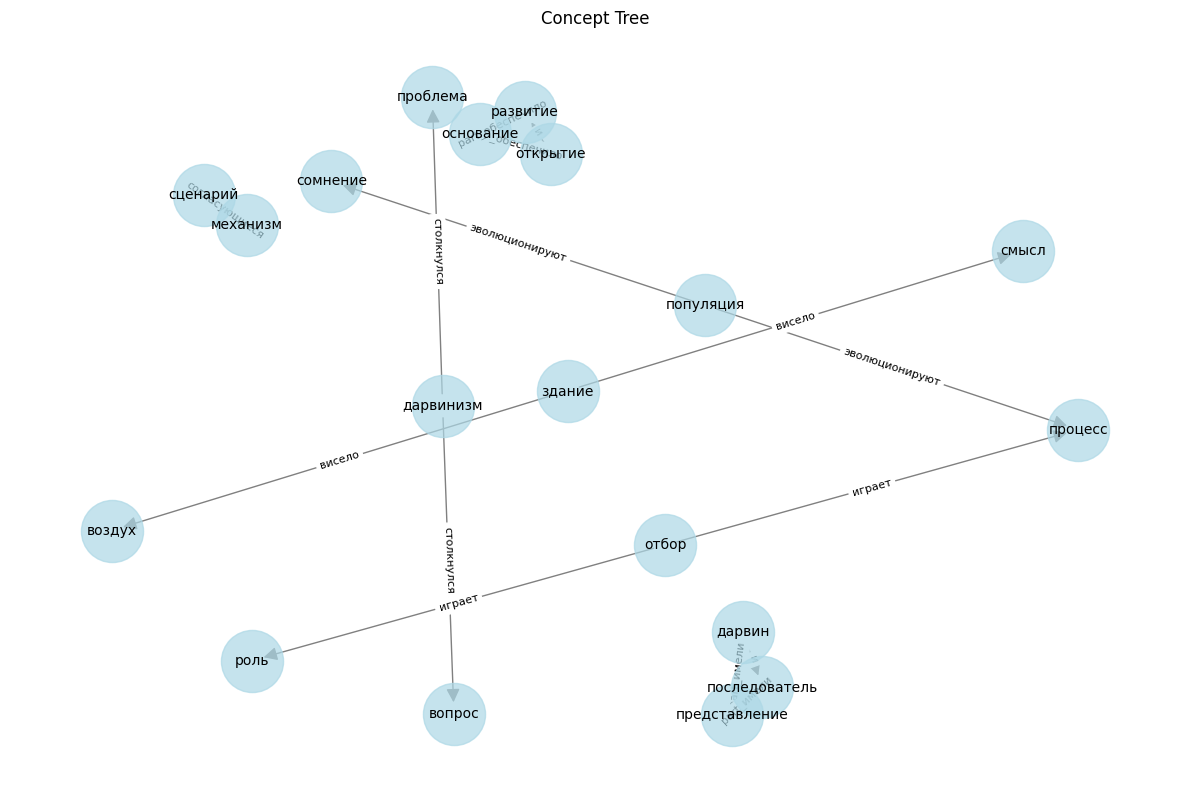

In [8]:
graph.visualize_graph(graph1)